In [1]:
from keras.layers import Input, Dense, Conv1D, LSTM , Flatten, Reshape
from keras.models import Model

from keras.datasets import mnist, cifar100
import numpy as np

import matplotlib.pyplot as plt

Using TensorFlow backend.


# Data

In [2]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

#x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
#x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


# Model

In [3]:
# size of encoded representations
encoding_dim = 64

# this is our input placeholder
input_img = Input(shape=(28,28))

# encoded representation of the input
encoded = Conv1D(120, 3)(input_img)
encoded = Conv1D(120,5)(encoded)
encoded = Conv1D(120,7)(encoded)
encoded = Flatten()(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)

# map input to its encoded representation
encoder = Model(input_img, encoded)


# input to the decoder
encoded_input = Input(shape=(encoding_dim,))

# reconstruction of the input
decoded = Dense(256, activation='softmax')(encoded_input)
decoded = Dense(784, activation='sigmoid')(decoded)

# decoder model
decoder = Model(encoded_input, decoded)

# map an input to its reconstruction
out = decoder(encoder(input_img))
out = Reshape((28,28))(out)

autoencoder = Model(input_img,out)

In [4]:
encoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 26, 120)           10200     
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 22, 120)           72120     
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 16, 120)           100920    
_________________________________________________________________
flatten_1 (Flatten)          (None, 1920)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                122944    
Total params: 306,184
Trainable params: 306,184
Non-trainable params: 0
_____________________________________________________

In [5]:
decoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               16640     
_________________________________________________________________
dense_3 (Dense)              (None, 784)               201488    
Total params: 218,128
Trainable params: 218,128
Non-trainable params: 0
_________________________________________________________________


In [6]:
autoencoder.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28)            0         
_________________________________________________________________
model_1 (Model)              (None, 64)                306184    
_________________________________________________________________
model_2 (Model)              (None, 784)               218128    
_________________________________________________________________
reshape_1 (Reshape)          (None, 28, 28)            0         
Total params: 524,312
Trainable params: 524,312
Non-trainable params: 0
_________________________________________________________________


# Train

In [7]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 5s 80us/step - loss: 0.6159 - val_loss: 0.5491
Epoch 2/50
60000/60000 [==============================] - 3s 52us/step - loss: 0.5012 - val_loss: 0.4603
Epoch 3/50
60000/60000 [==============================] - 3s 52us/step - loss: 0.4296 - val_loss: 0.4035
Epoch 4/50
60000/60000 [==============================] - 3s 53us/step - loss: 0.3831 - val_loss: 0.3659
Epoch 5/50
60000/60000 [==============================] - 3s 56us/step - loss: 0.3521 - val_loss: 0.3404
Epoch 6/50
60000/60000 [==============================] - 3s 55us/step - loss: 0.3307 - val_loss: 0.3225
Epoch 7/50
60000/60000 [==============================] - 3s 54us/step - loss: 0.3155 - val_loss: 0.3096
Epoch 8/50
60000/60000 [==============================] - 3s 52us/step - loss: 0.3045 - val_loss: 0.3000
Epoch 9/50
60000/60000 [==============================] - 3s 53us/step - loss: 0.2962 - val_loss: 0.2928
Epoch

# Visualize

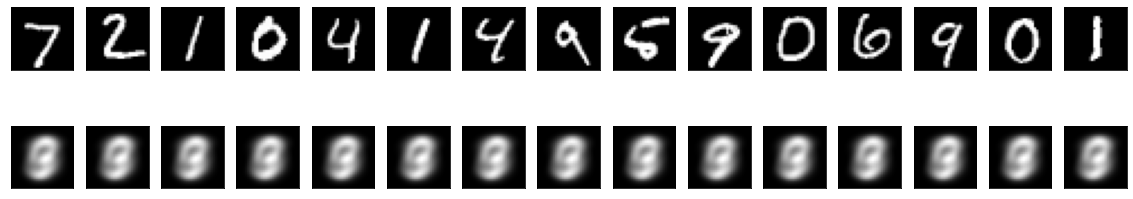

In [8]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

n = 15 
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()